In [1]:
# library imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# data exploration 
# end-goal: based on water level quality, and compliance in 2019, 2020
# predict the compliance in 2021 per measurement station
# not compliant - 1, compliant - 0
train_df = pd.read_csv("data/train.csv")
train_df.head()

,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,...,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
0,487,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,1.6,0.2,7.80,7.60,0,0,0
1,1555,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,7.30,7.10,0,0,0
2,205,NaN,10.0,0.05,0.24,NaN,0.100,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,7.80,7.70,0,0,0
3,1228,NaN,NaN,0.09,0.05,0.641,0.932,NaN,NaN,NaN,...,1.0,NaN,NaN,0.5,0.5,7.44,7.58,0,0,0
4,470,NaN,NaN,0.06,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.2,44.0,7.70,8.00,0,1,0


In [4]:
train_df.columns

Index(['station_id', 'Aluminium_2019', 'Aluminium_2020', 'Ammonium_2019',
       'Ammonium_2020', 'Boron_2019', 'Boron_2020', 'Chloride_2019',
       'Chloride_2020', 'Coli-like-bacteria-Colilert_2019',
       'Coli-like-bacteria-Colilert_2020', 'Coli-like-bacteria_2019',
       'Coli-like-bacteria_2020', 'Colony-count-at-22-C_2019',
       'Colony-count-at-22-C_2020', 'Color-Pt-Co-unit_2019',
       'Color-Pt-Co-unit_2020', 'Color-Pt/Co-scale_2019',
       'Color-Pt/Co-scale_2020', 'Electrical-conductivity_2019',
       'Electrical-conductivity_2020', 'Enterococci_2019', 'Enterococci_2020',
       'Escherichia-coli-Colilert_2019', 'Escherichia-coli-Colilert_2020',
       'Escherichia-coli_2019', 'Escherichia-coli_2020', 'Fluoride_2019',
       'Fluoride_2020', 'Iron_2019', 'Iron_2020', 'Manganese_2019',
       'Manganese_2020', 'Nitrate_2019', 'Nitrate_2020', 'Nitrite_2019',
       'Nitrite_2020', 'Odour-dilution-level_2019',
       'Odour-dilution-level_2020', 'Oxidability_2019', 'Ox

In [5]:
train_df.describe()

,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,...,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
count,440.000000,103.000000,94.000000,307.000000,290.000000,116.000000,108.000000,111.000000,114.000000,125.000000,...,103.000000,305.000000,306.000000,419.000000,426.000000,432.000000,438.000000,440.000000,440.000000,440.000000
mean,847.884091,16.932117,10.102528,0.139752,0.132352,0.321819,0.497083,68.046847,66.514912,20.708800,...,0.524272,1.596721,1.650327,1.404081,1.395329,7.586852,7.652922,0.197727,0.200000,0.150000
std,482.227347,73.882649,12.298492,0.294113,0.236251,0.423732,0.939406,95.549023,84.631374,216.467309,...,0.639311,1.540460,1.429874,3.183978,2.982040,0.303888,0.315106,0.398739,0.400455,0.357478
min,165.000000,0.002000,0.002000,0.027000,0.020000,0.002000,0.009000,1.000000,0.700000,0.000000,...,0.000000,1.000000,1.000000,0.180000,0.140000,6.500000,6.600000,0.000000,0.000000,0.000000
25%,460.500000,5.000000,5.000000,0.050000,0.050000,0.100000,0.100000,4.900000,10.125000,0.000000,...,0.000000,1.000000,1.000000,0.960000,0.850000,7.400000,7.400000,0.000000,0.000000,0.000000
50%,741.000000,10.000000,5.000000,0.050000,0.050000,0.178500,0.252500,21.500000,31.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,7.600000,7.600000,0.000000,0.000000,0.000000
75%,1174.000000,10.000000,10.000000,0.140000,0.140000,0.403500,0.598500,99.500000,98.475000,0.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,7.800000,7.900000,0.000000,0.000000,0.000000
max,2311.000000,754.000000,76.900000,3.500000,3.300000,3.700000,7.700000,461.000000,468.000000,2419.600000,...,3.000000,16.000000,16.000000,50.000000,44.000000,8.640000,8.470000,1.000000,1.000000,1.000000


In [6]:
# sanity drop 
train_df = train_df.drop_duplicates()

In [7]:
# every row contains at least one nan 
len(train_df.isna()) / len(train_df)

1.0

<AxesSubplot:ylabel='feature'>

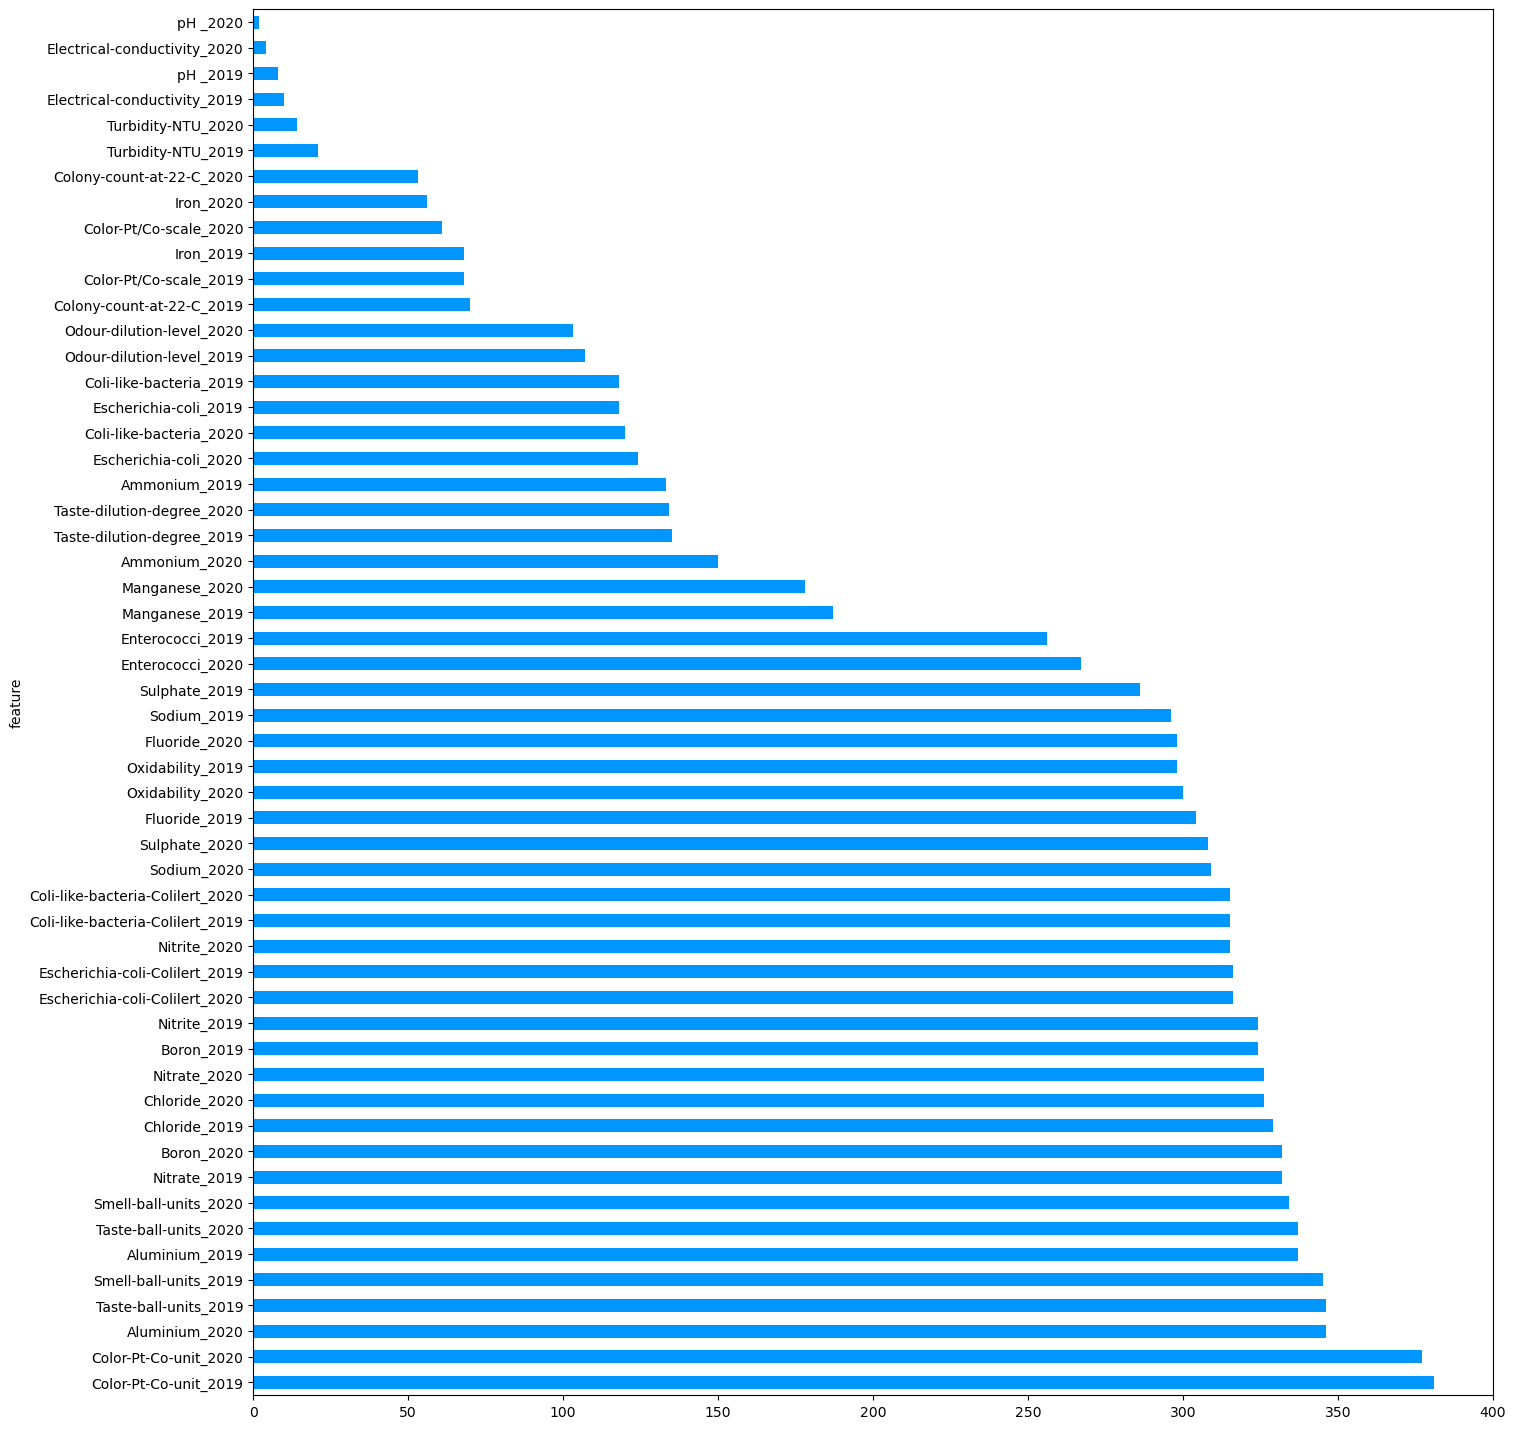

In [8]:
# amount of rows affected per column
plot_width, plot_height = (16,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
train_df.isna().sum()[train_df.isna().sum()>0].sort_values(ascending = False).plot(xlabel = "feature", color = "#0096ff", ylabel = "amount of NaNs", kind='barh')

In [9]:
# dropping columns that had more than 50% of rows with NaN 
perc = 50.0
modified_df = train_df.dropna(axis=1, thresh=int(((100-perc)/100)* len(train_df) + 1))
modified_df.columns

Index(['station_id', 'Ammonium_2019', 'Ammonium_2020',
       'Coli-like-bacteria_2019', 'Coli-like-bacteria_2020',
       'Colony-count-at-22-C_2019', 'Colony-count-at-22-C_2020',
       'Color-Pt/Co-scale_2019', 'Color-Pt/Co-scale_2020',
       'Electrical-conductivity_2019', 'Electrical-conductivity_2020',
       'Escherichia-coli_2019', 'Escherichia-coli_2020', 'Iron_2019',
       'Iron_2020', 'Manganese_2019', 'Manganese_2020',
       'Odour-dilution-level_2019', 'Odour-dilution-level_2020',
       'Taste-dilution-degree_2019', 'Taste-dilution-degree_2020',
       'Turbidity-NTU_2019', 'Turbidity-NTU_2020', 'pH _2019', 'pH _2020',
       'compliance_2019', 'compliance_2020', 'compliance_2021'],
      dtype='object')

<AxesSubplot:>

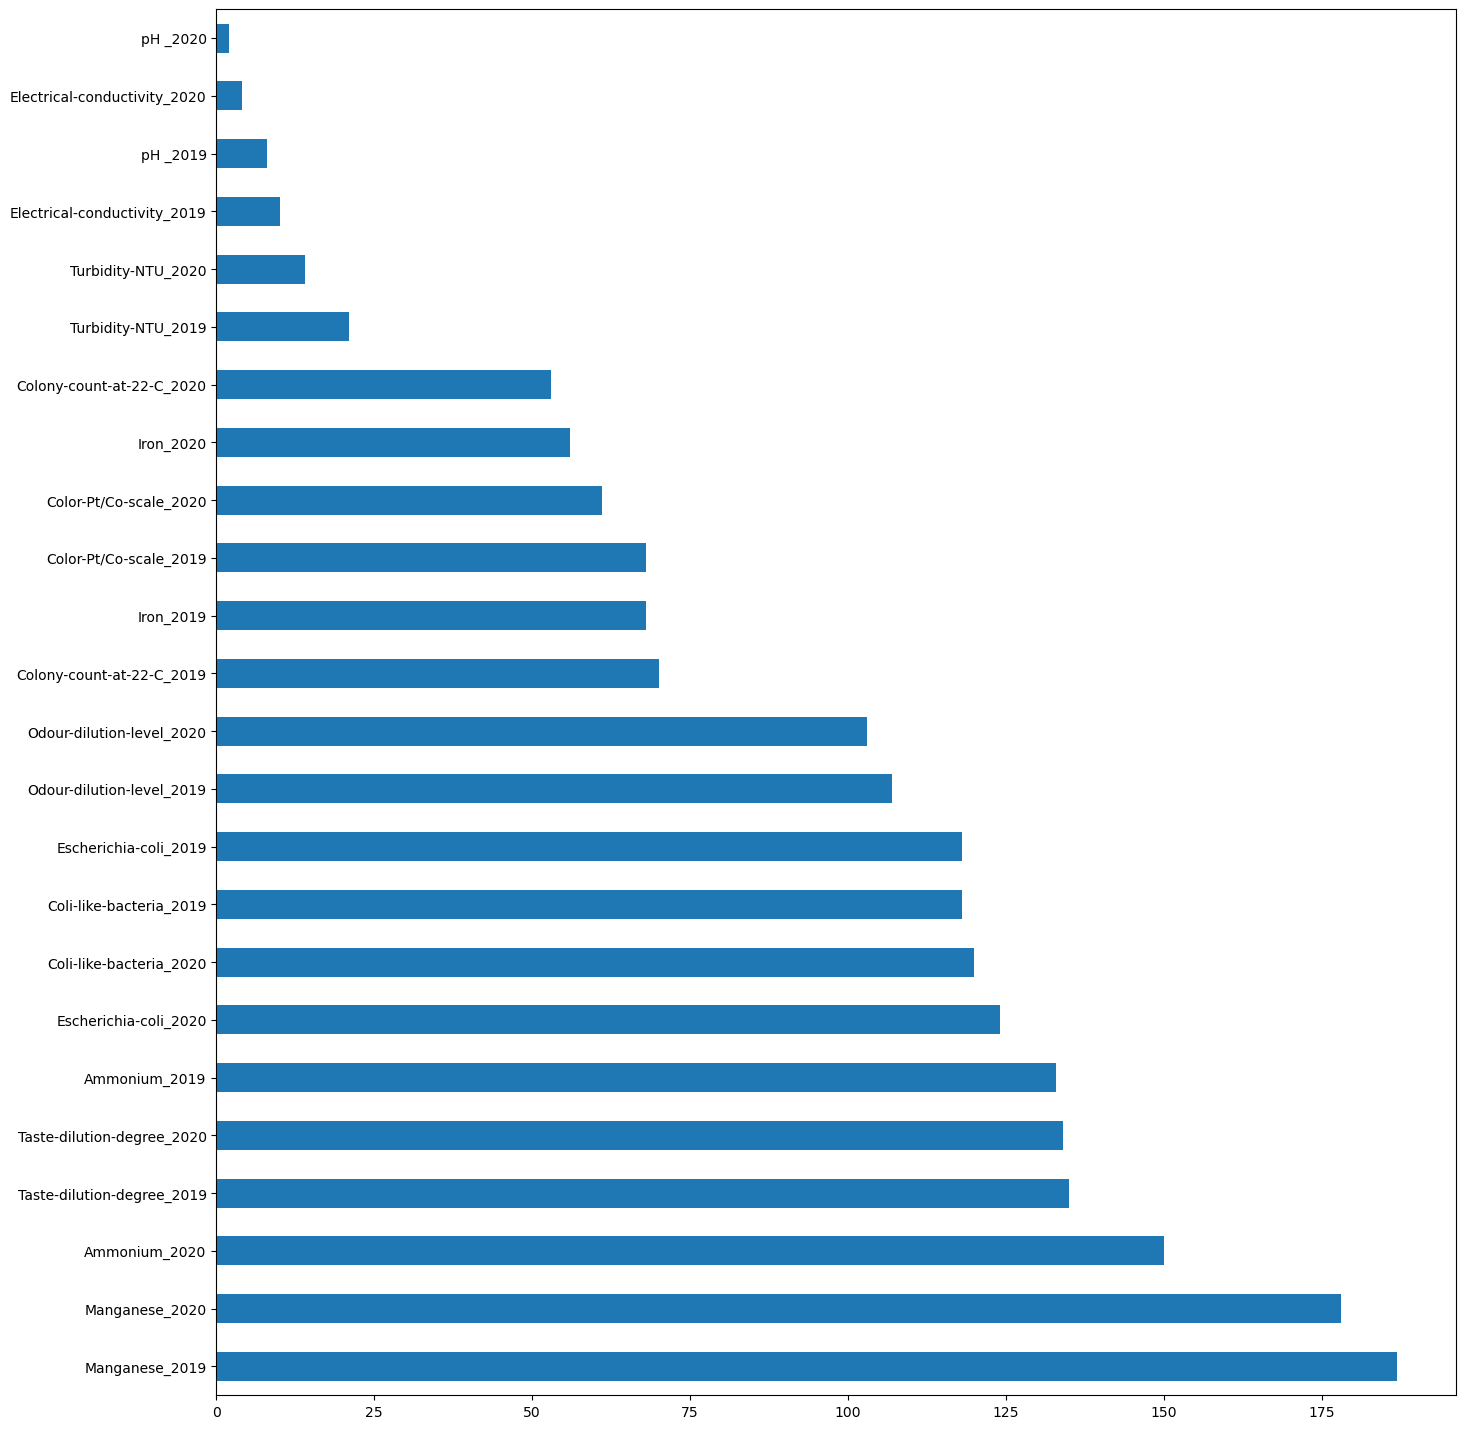

In [10]:
# amount of rows affected per column
plot_width, plot_height = (16,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
modified_df.isna().sum()[modified_df.isna().sum()>0].sort_values(ascending = False).plot(kind='barh')

In [18]:
# dropping nan-s would return only 32 rows :)
len(modified_df.dropna())

32

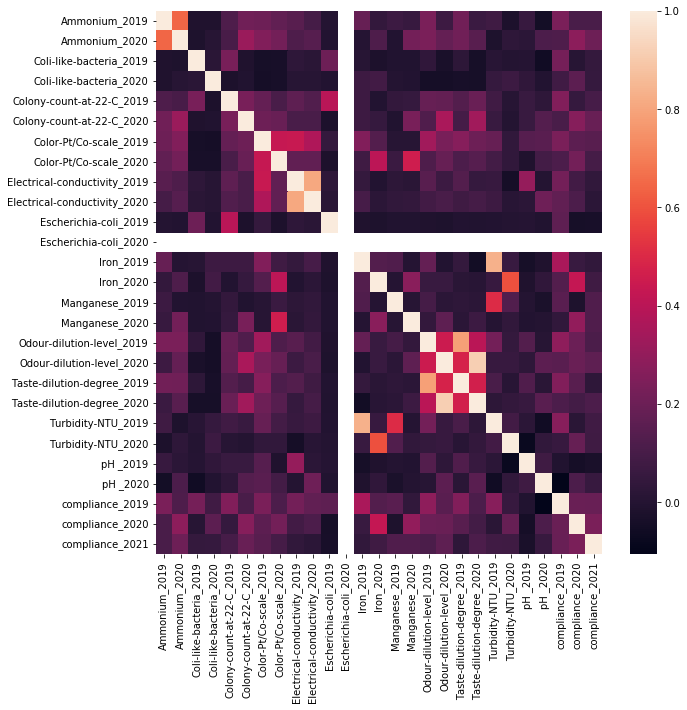

In [21]:
# plotting correlation between diff attributes with seaborn
plt.figure(figsize=(10,10))
sns.heatmap(
    modified_df.iloc[:, 1:,].fillna(0).corr()
)

How to impute NA values?:
* The correlation matrix tells us that backfilling with axis = 1 (along columns) would not work 
* Dropping all NaNs will leave us only 32 rows
* Filling with 0 would leave the impression that no particle was detected 
* If the station location would be known, there is the option to interpolate based on location of station to other stations 

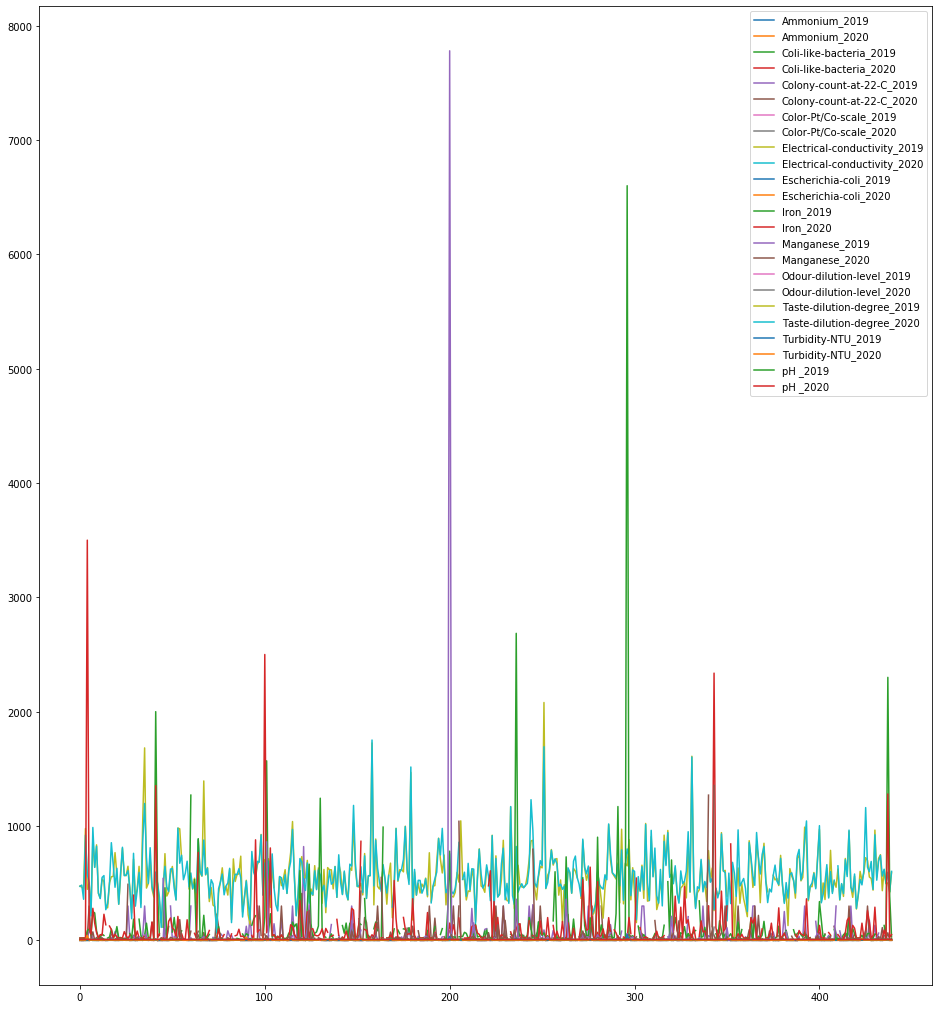

In [12]:
# stations based on index
modified_df.iloc[:, 1:-3].plot()

In [11]:
# assumption that the stations closer by id have more similar features- can interpolate better
modified_df.sort_values(by = "station_id", inplace = True)

/tmp/ipykernel_595890/3680894700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df.sort_values(by = "station_id", inplace = True)


<AxesSubplot:>

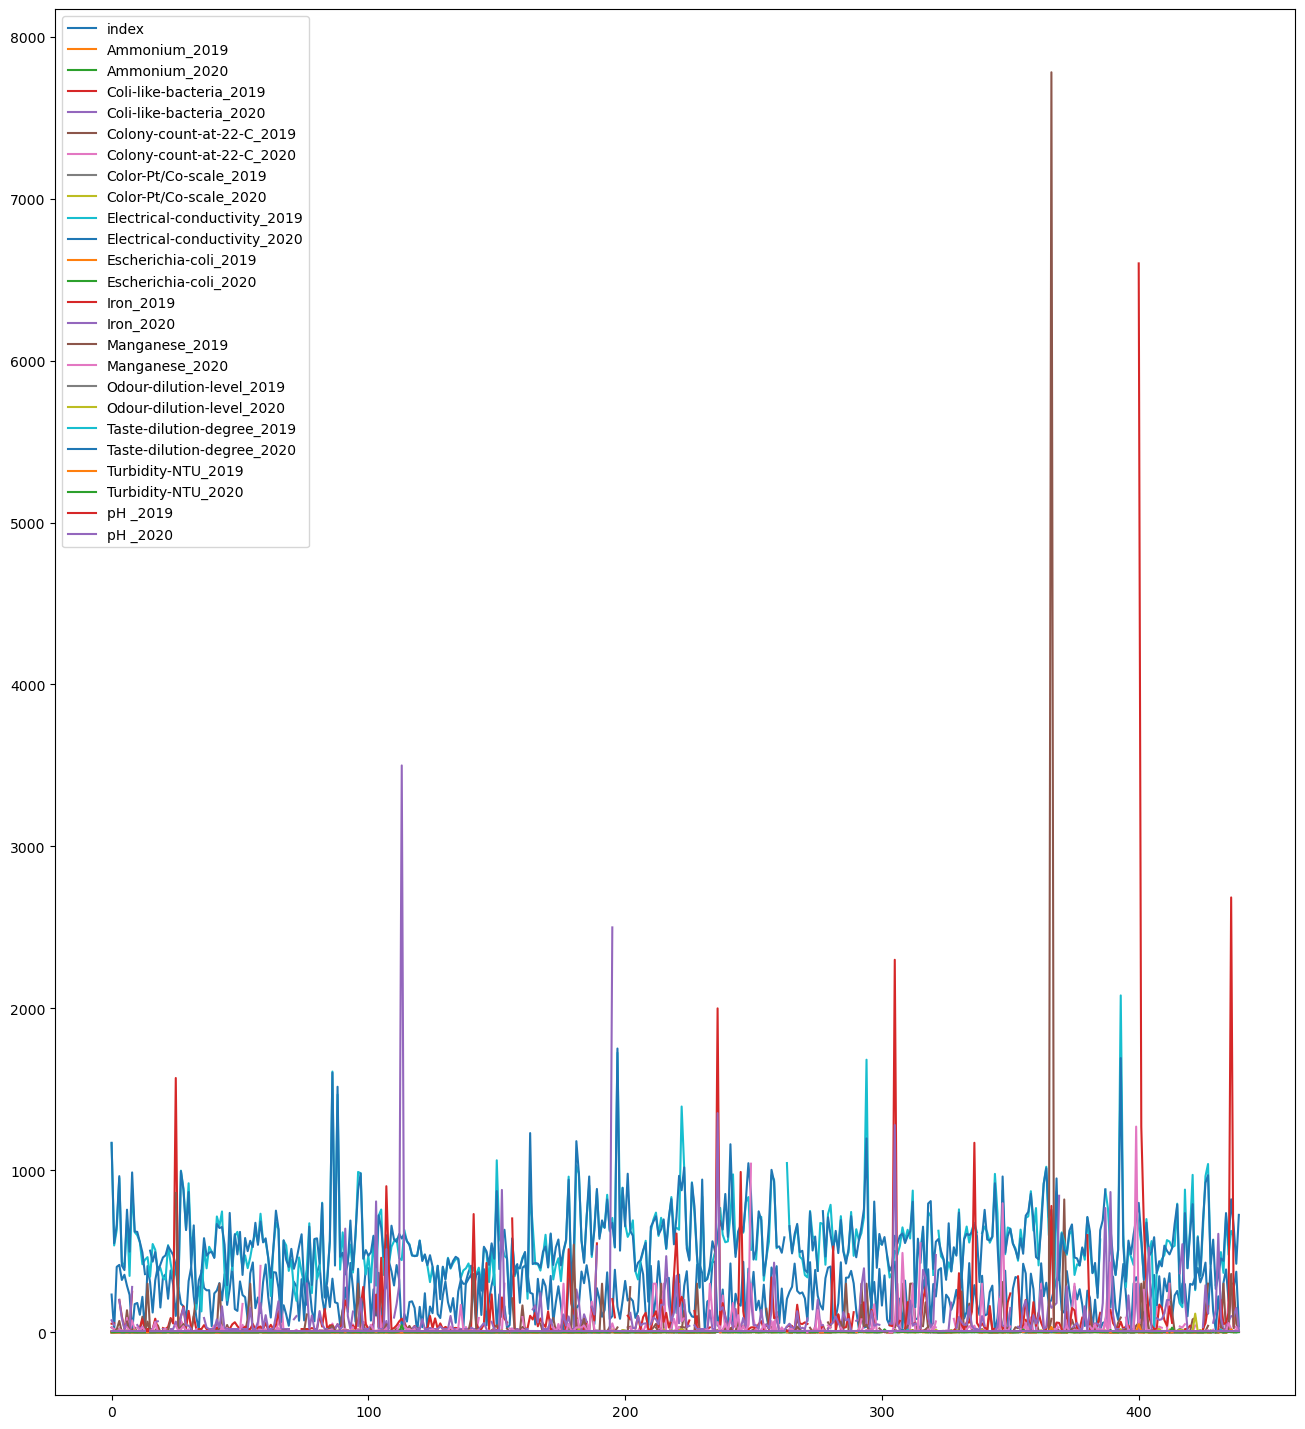

In [12]:
# maybe more flatter areas?
modified_df.iloc[:, 1:-3].reset_index().plot()

Ammonium_2020


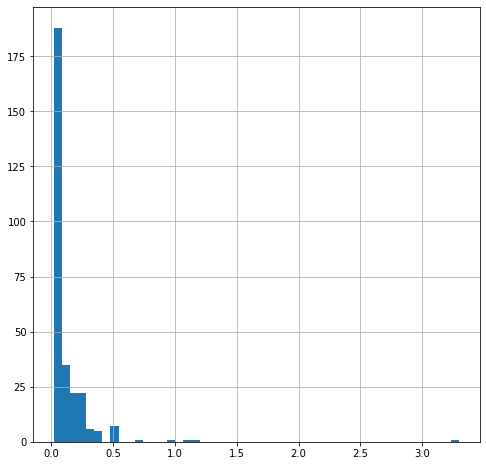

Coli-like-bacteria_2019


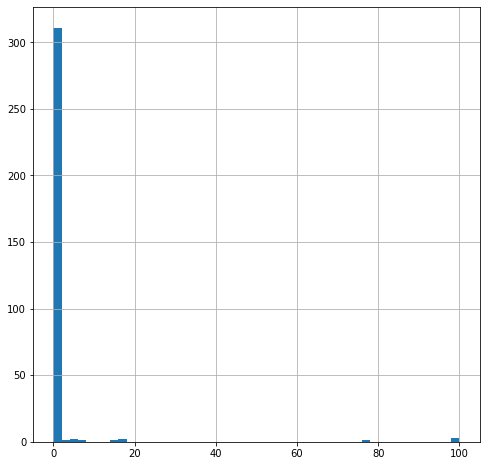

Coli-like-bacteria_2020


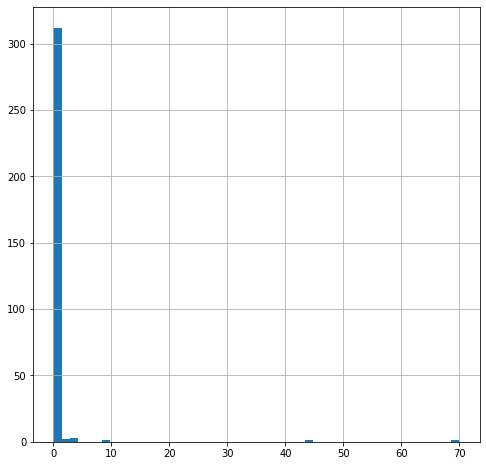

Colony-count-at-22-C_2019


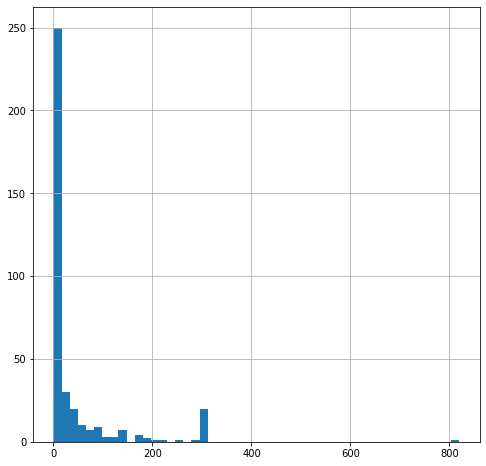

Colony-count-at-22-C_2020


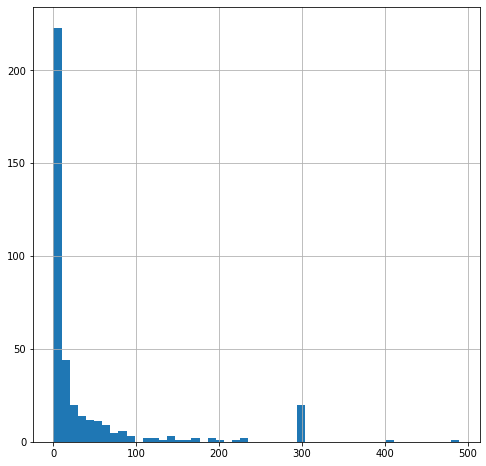

Color-Pt/Co-scale_2019


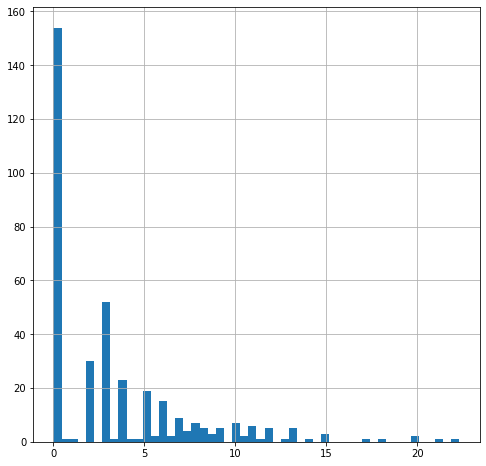

Color-Pt/Co-scale_2020


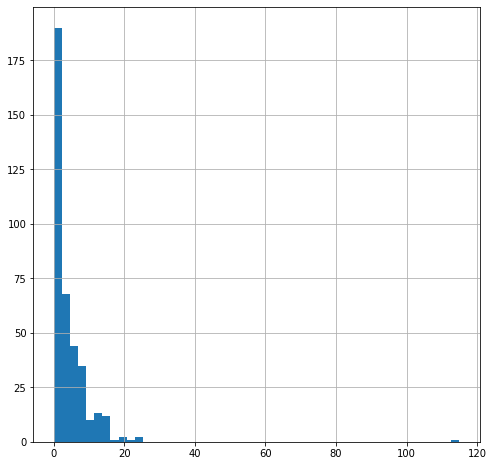

Electrical-conductivity_2019


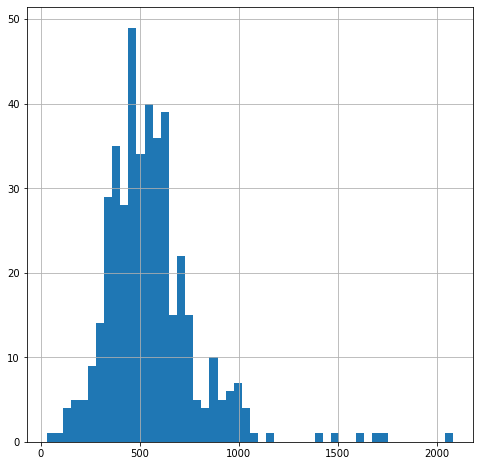

Electrical-conductivity_2020


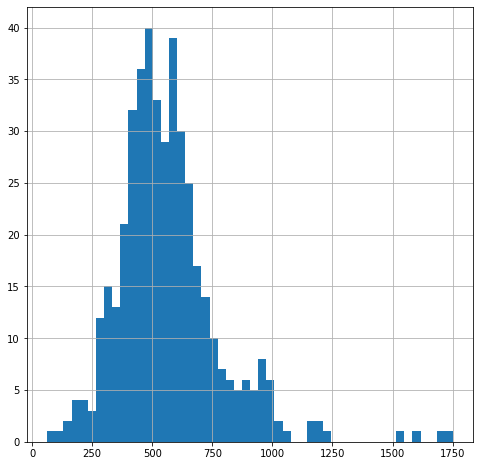

Escherichia-coli_2019


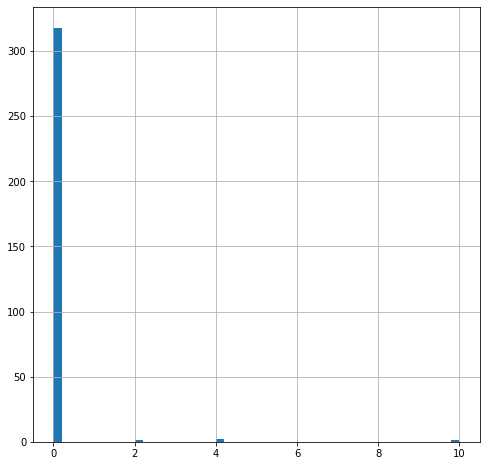

Escherichia-coli_2020


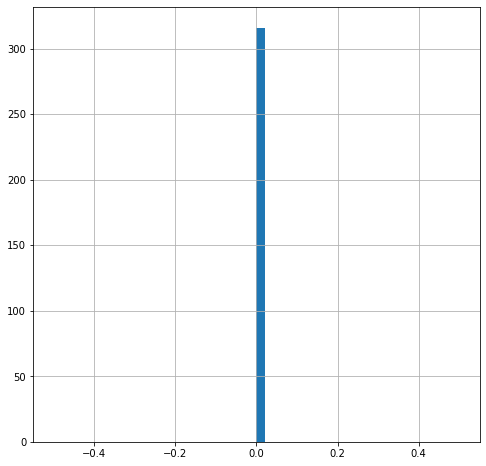

Iron_2019


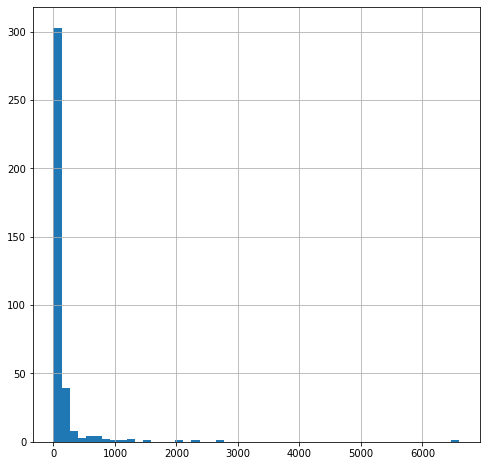

Iron_2020


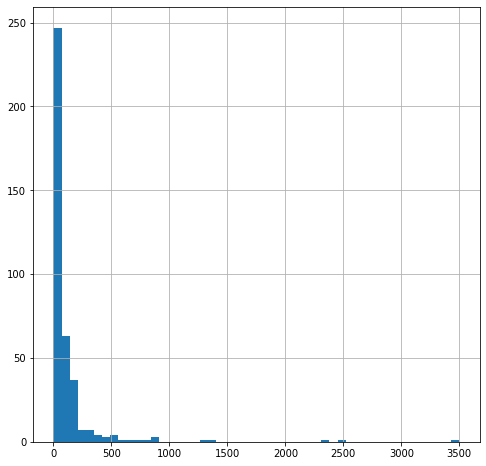

Manganese_2019


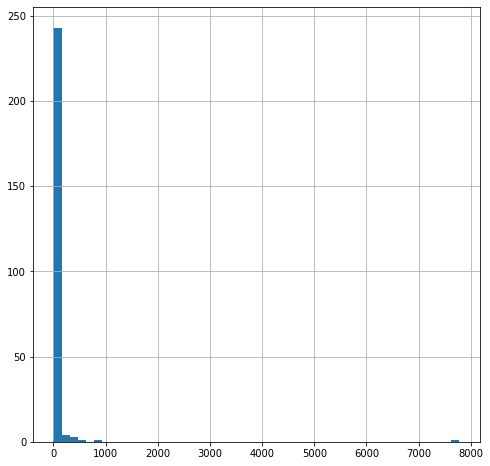

Manganese_2020


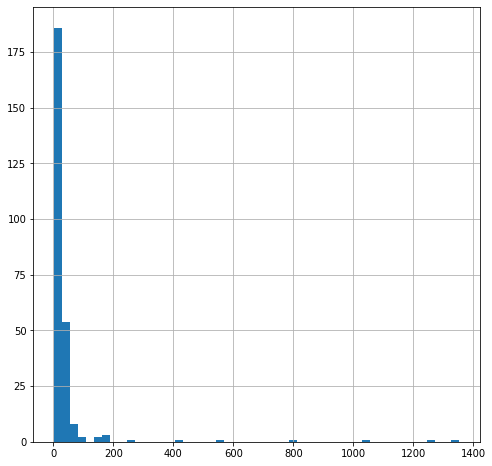

Odour-dilution-level_2019


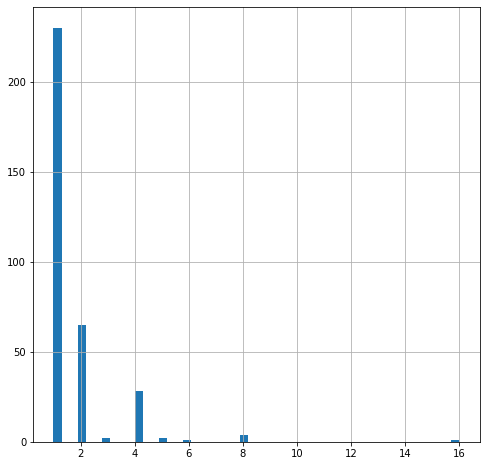

Odour-dilution-level_2020


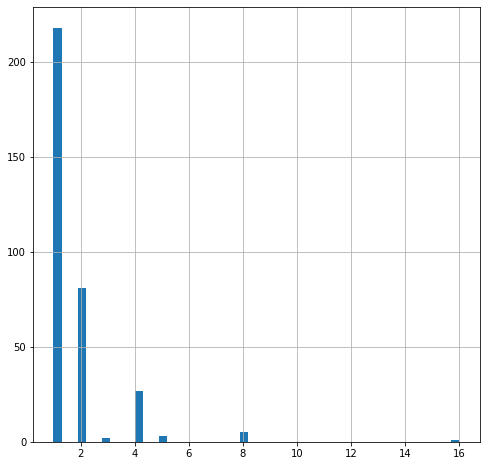

Taste-dilution-degree_2019


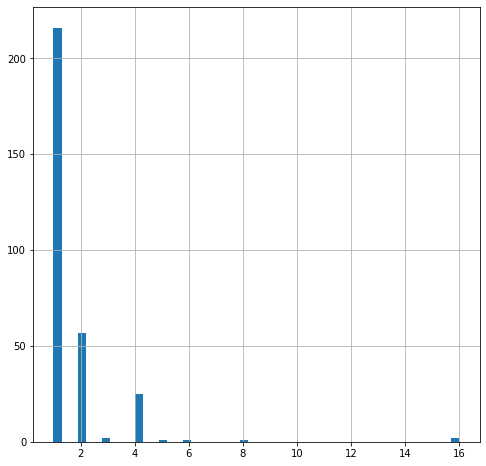

Taste-dilution-degree_2020


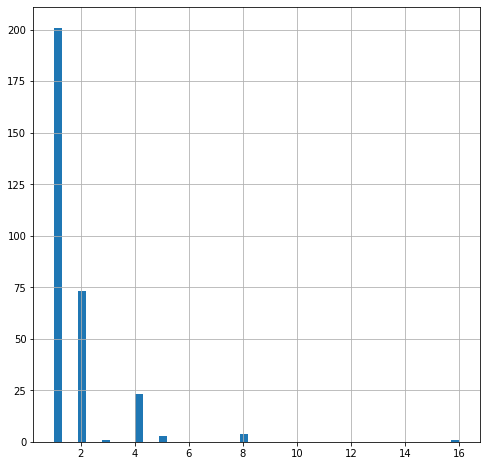

Turbidity-NTU_2019


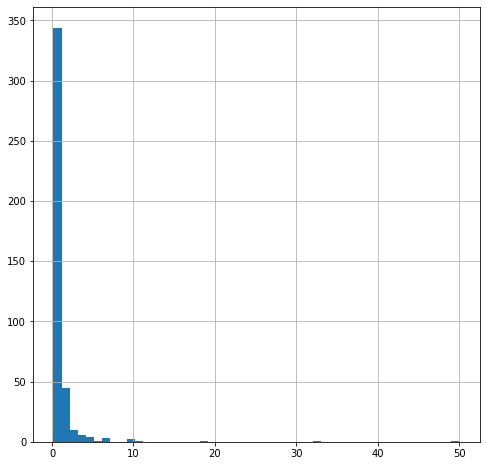

Turbidity-NTU_2020


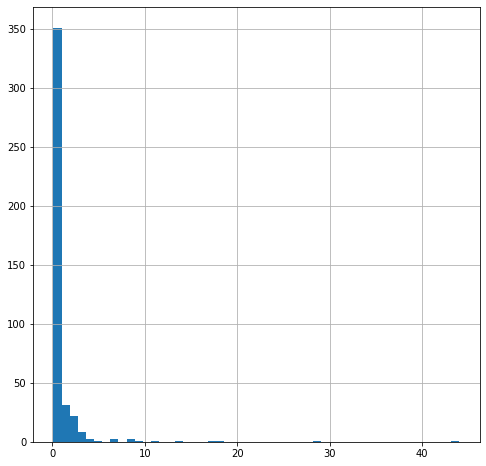

pH _2019


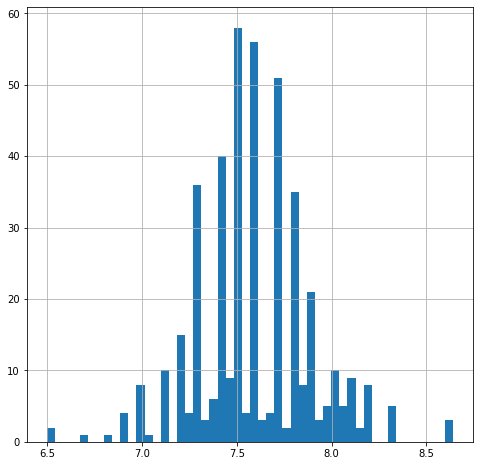

pH _2020


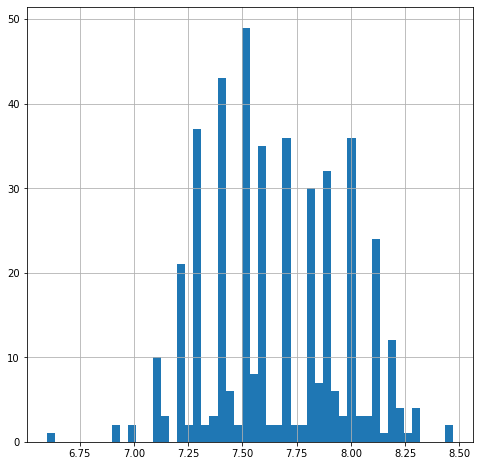

In [15]:
# checking out the distributions of features
# TODO: make subplots?
for val in modified_df.columns[2:-3]:
    plt.figure(figsize=(8,8))
    print(val)
    modified_df[f"{val}"].hist(bins = 50)
    plt.show()

Most attributes follow exponential distributions, except for: 
* electrical conductivity which tends to have a negative binomial distribution
* pH has a relatively gaussian distribution 

In [14]:
# will fill the NaNs in E-coli 2020 as 0 - only unique value
modified_df[["Escherichia-coli_2020"]] = modified_df[["Escherichia-coli_2020"]].fillna(value=0)

/tmp/ipykernel_595890/3855632078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df[["Escherichia-coli_2020"]] = modified_df[["Escherichia-coli_2020"]].fillna(value=0)


In [15]:
# interpolation of nan values using slinear with 5 points
for val in modified_df.columns[1:-3]:
    modified_df[f"{val}"].interpolate(method="slinear", order = 5, limit = 3, inplace = True)

/tmp/ipykernel_595890/4075065699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df[f"{val}"].interpolate(method="slinear", order = 5, limit = 3, inplace = True)


In [19]:
modified_df.columns[1:-3]

Index(['Ammonium_2019', 'Ammonium_2020', 'Coli-like-bacteria_2019',
       'Coli-like-bacteria_2020', 'Colony-count-at-22-C_2019',
       'Colony-count-at-22-C_2020', 'Color-Pt/Co-scale_2019',
       'Color-Pt/Co-scale_2020', 'Electrical-conductivity_2019',
       'Electrical-conductivity_2020', 'Escherichia-coli_2019',
       'Escherichia-coli_2020', 'Iron_2019', 'Iron_2020', 'Manganese_2019',
       'Manganese_2020', 'Odour-dilution-level_2019',
       'Odour-dilution-level_2020', 'Taste-dilution-degree_2019',
       'Taste-dilution-degree_2020', 'Turbidity-NTU_2019',
       'Turbidity-NTU_2020', 'pH _2019', 'pH _2020'],
      dtype='object')

In [ ]:
# dropping leftover - left with 305 rows out of initial 440 (69%) - train.csv
modified_df_ver = modified_df.dropna()
modified_df_ver.to_csv("clean_data/train.csv", index = False)

In [24]:
# imputing the leftover nan-s with feature median 
# keeps 440 rows - train_part_impute.csv 

for col in modified_df.columns[1:-3]:
    
    modified_df[f"{col}"] = modified_df[f"{col}"].fillna(modified_df[f"{col}"].median())

/tmp/ipykernel_595890/3589510173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df[f"{col}"] = modified_df[f"{col}"].fillna(modified_df[f"{col}"].median())


In [28]:
modified_df.to_csv("clean_data/train_part_impute.csv", index = False)

In [40]:
### imputing all values in original df with just median 
imp_train_df = train_df.copy(deep = True)
for col in imp_train_df.columns[1:-3]:

    imp_train_df[f"{col}"] = imp_train_df[f"{col}"].fillna(imp_train_df[f"{col}"].median())

In [42]:
imp_train_df.to_csv("clean_data/train_median_impute.csv", index = False)

In [51]:
# avoid neighbors import error 
# https://stackoverflow.com/questions/60145652/no-module-named-sklearn-neighbors-base
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [61]:
### imputing all values with RF
# https://towardsdatascience.com/how-to-use-python-and-missforest-algorithm-to-impute-missing-data-ed45eb47cb9a

from missingpy import MissForest

rf_train_df = train_df.copy(deep = True)
# Make an instance and perform the imputation

#for col in rf_train_df.columns[1:-3]:
imputer = MissForest()
rf_train_df = imputer.fit_transform(rf_train_df)


/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

Iteration: 0


/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

Iteration: 1


/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

Iteration: 2


In [71]:
rf_train = train_df.copy(deep = True)
for i, col in enumerate(rf_train.columns):
    
    rf_train[f"{col}"] = rf_train_df[:, i]

In [74]:
rf_train.to_csv("clean_data/train_rf_impute.csv", index = False)

In [34]:
df_ver = pd.DataFrame()

In [35]:
def split_list(alist, wanted_parts=1):
    length = len(alist)
    return [ alist[i*length // wanted_parts: (i+1)*length // wanted_parts] 
             for i in range(wanted_parts) ]

In [36]:
for pair in split_list(df.columns[1:-3], wanted_parts = int(len(df.columns[1:-3]) / 2)): 
    col = pair[0].split("_2019")[0]
    df_ver[f"{col}"] = pd.Series(df[pair].values.ravel('F'))

In [60]:
# inserting station_id, compliance values 
df_ver.insert(0, "station_id", np.append(np.array(df["station_id"]), np.array(df["station_id"])))
df_ver.insert(len(df_ver.columns), "compliance", np.append(np.array(df["compliance_2019"]), np.array(df["compliance_2020"])))

In [61]:
df_ver

,station_id,Aluminium,Ammonium,Boron,Chloride,Coli-like-bacteria-Colilert,Coli-like-bacteria,Colony-count-at-22-C,Color-Pt-Co-unit,Color-Pt/Co-scale,...,Odour-dilution-level,Oxidability,Smell-ball-units,Sodium,Sulphate,Taste-ball-units,Taste-dilution-degree,Turbidity-NTU,pH,compliance
0,487.0,26.544,0.05000,0.585790,6.540,0.000,0.00,6.14,1.800,2.483,...,1.20,1.2127,0.00,29.955,9.596,0.00,1.00,1.6,7.80,0.0
1,1555.0,17.435,0.05000,0.102940,5.529,3.396,0.00,0.00,2.833,0.000,...,1.00,1.7168,0.92,7.368,11.392,1.16,1.00,1.0,7.30,0.0
2,205.0,13.571,0.05000,0.078290,3.389,0.000,0.00,0.00,7.725,0.000,...,1.00,1.0634,0.89,16.714,6.330,1.22,1.00,1.0,7.80,0.0
3,1228.0,12.204,0.09000,0.641000,208.985,155.281,0.00,15.00,5.607,4.000,...,2.02,1.3057,1.00,92.209,74.995,1.00,2.41,0.5,7.44,0.0
4,470.0,21.785,0.06000,0.595110,23.244,226.195,0.00,1.00,6.600,10.962,...,2.19,1.7343,0.00,59.128,14.153,0.00,1.99,0.2,7.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,830.0,7.103,0.15932,0.101105,16.237,0.000,0.00,3.00,5.829,3.000,...,2.00,2.3488,1.00,31.322,12.708,1.05,2.00,1.0,7.70,0.0
876,803.0,9.773,0.05000,0.123350,16.172,0.160,0.00,10.00,4.535,5.000,...,1.00,1.5004,1.00,24.743,11.747,1.08,1.00,1.0,7.50,0.0
877,1081.0,5.000,0.27000,0.274000,14.000,0.000,19.91,66.00,5.882,6.000,...,4.00,3.1000,1.07,28.400,3.000,1.48,4.11,11.0,7.60,1.0
878,458.0,16.123,0.05000,3.726190,11.534,0.530,0.00,1.00,2.700,2.849,...,1.99,1.4883,0.00,45.076,11.651,0.00,1.95,0.3,8.00,0.0


In [63]:
"clean_data/train.csv".split("/")[1]

'train.csv'

In [65]:
files = ["clean_data/train.csv", "clean_data/train_part_impute.csv", "clean_data/train_median_impute.csv", "clean_data/train_rf_impute.csv"]

for file in files: 
    df = pd.read_csv(file, index_col = 0)
    df_ver = pd.DataFrame()
    for pair in split_list(df.columns[1:-3], wanted_parts = int(len(df.columns[1:-3]) / 2)): 
        col = pair[0].split("_2019")[0]
        df_ver[f"{col}"] = pd.Series(df[pair].values.ravel('F'))
    df_ver.insert(0, "station_id", np.append(np.array(df["station_id"]), np.array(df["station_id"])))
    df_ver.insert(len(df_ver.columns), "compliance", np.append(np.array(df["compliance_2019"]), np.array(df["compliance_2020"])))
    df_ver.to_csv(f"merged_data/{file.split('/')[1]}", index = False)
    

Test dataframe should have the same columns and imputation done

In [29]:
# end-goal: based on water level quality, and compliance in 2019, 2020
# predict the compliance in 2021 per measurement station
# not compliant - 1, compliant - 0
test_df = pd.read_csv("data/test.csv")
test_df.head()

,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,...,Taste-ball-units_2019,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020
0,163,5.0,5.0,0.08,0.08,0.071,0.062,130.0,102.0,NaN,...,NaN,NaN,1.0,1.0,1.18,1.90,8.17,8.12,0,0
1,167,NaN,NaN,0.08,0.08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,3.0,3.90,1.54,7.83,7.81,1,0
2,171,NaN,NaN,NaN,NaN,NaN,NaN,112.0,90.0,NaN,...,NaN,NaN,2.0,1.0,1.40,1.50,7.50,7.60,0,1
3,174,5.0,5.0,0.05,0.09,0.072,0.075,248.0,243.0,0.0,...,NaN,NaN,2.0,8.0,1.00,1.00,7.70,7.80,0,0
4,178,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,1.00,1.00,7.50,7.40,0,0


In [21]:
list(modified_df.columns)[:-1]

['station_id',
 'Ammonium_2019',
 'Ammonium_2020',
 'Coli-like-bacteria_2019',
 'Coli-like-bacteria_2020',
 'Colony-count-at-22-C_2019',
 'Colony-count-at-22-C_2020',
 'Color-Pt/Co-scale_2019',
 'Color-Pt/Co-scale_2020',
 'Electrical-conductivity_2019',
 'Electrical-conductivity_2020',
 'Escherichia-coli_2019',
 'Escherichia-coli_2020',
 'Iron_2019',
 'Iron_2020',
 'Manganese_2019',
 'Manganese_2020',
 'Odour-dilution-level_2019',
 'Odour-dilution-level_2020',
 'Taste-dilution-degree_2019',
 'Taste-dilution-degree_2020',
 'Turbidity-NTU_2019',
 'Turbidity-NTU_2020',
 'pH _2019',
 'pH _2020',
 'compliance_2019',
 'compliance_2020']

In [30]:
test_df = test_df[list(modified_df.columns)[:-1]]

In [31]:
test_df["Escherichia-coli_2019"].unique()

array([ 0., nan])

In [32]:
# will fill the NaNs in E-coli 2020 as 0 - only unique value
test_df[["Escherichia-coli_2020"]] = test_df[["Escherichia-coli_2020"]].fillna(value=0)

In [33]:
# assumption that the stations closer are location-wise closer - can interpolate
test_df.sort_values(by = "station_id", inplace = True)

In [34]:
# interpolation of nan values using slinear with 5 points
for val in test_df.columns[1:-2]:
    test_df[f"{val}"].interpolate(method="slinear", order = 5, limit = 3, inplace = True)

In [ ]:
# dropping left over NaN-s instead of median - left with 156 out 189 initial rows (82%) - test.csv
test_df_nan = test_df.dropna()
test_df_nan.to_csv("clean_data/test.csv", index = False)

In [35]:
# imputing the leftover nan-s with feature median 
# keeps 440 rows - train_part_impute.csv 

for col in test_df.columns[1:-2]:
    
    test_df[f"{col}"] = test_df[f"{col}"].fillna(test_df[f"{col}"].median())

In [36]:
test_df.to_csv("clean_data/test_part_impute.csv", index = False)

In [70]:
test_df = pd.read_csv("data/test.csv")

In [68]:
test_df.columns[1:-2]

Index(['Aluminium_2019', 'Aluminium_2020', 'Ammonium_2019', 'Ammonium_2020',
       'Boron_2019', 'Boron_2020', 'Chloride_2019', 'Chloride_2020',
       'Coli-like-bacteria-Colilert_2019', 'Coli-like-bacteria-Colilert_2020',
       'Coli-like-bacteria_2019', 'Coli-like-bacteria_2020',
       'Colony-count-at-22-C_2019', 'Colony-count-at-22-C_2020',
       'Color-Pt-Co-unit_2019', 'Color-Pt-Co-unit_2020',
       'Color-Pt/Co-scale_2019', 'Color-Pt/Co-scale_2020',
       'Electrical-conductivity_2019', 'Electrical-conductivity_2020',
       'Enterococci_2019', 'Enterococci_2020',
       'Escherichia-coli-Colilert_2019', 'Escherichia-coli-Colilert_2020',
       'Escherichia-coli_2019', 'Escherichia-coli_2020', 'Fluoride_2019',
       'Fluoride_2020', 'Iron_2019', 'Iron_2020', 'Manganese_2019',
       'Manganese_2020', 'Nitrate_2019', 'Nitrate_2020', 'Nitrite_2019',
       'Nitrite_2020', 'Odour-dilution-level_2019',
       'Odour-dilution-level_2020', 'Oxidability_2019', 'Oxidability_2020

In [71]:
### imputing with median only 
imp_test_df = test_df.copy(deep = True)
for col in imp_test_df.columns[1:-2]:

    imp_test_df[f"{col}"] = imp_test_df[f"{col}"].fillna(imp_test_df[f"{col}"].median())

In [77]:
# saving 
imp_test_df.to_csv("clean_data/test_median_impute.csv")

In [76]:
### imputing using RF
from missingpy import MissForest

rf_test_df = test_df.copy(deep = True)
# Make an instance and perform the imputation

#for col in rf_train_df.columns[1:-3]:
imputer = MissForest()
rf_test_df = imputer.fit_transform(rf_test_df)

rf_test = test_df.copy(deep = True)
for i, col in enumerate(rf_test.columns):
    rf_test[f"{col}"] = rf_test_df[:, i]
    
rf_test.to_csv("clean_data/test_rf_impute.csv", index = False)

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

Iteration: 0


/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

Iteration: 1


/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `ma

Iteration: 2


In [79]:
#### merging years into one column

files = ["clean_data/test.csv", "clean_data/test_part_impute.csv", "clean_data/test_median_impute.csv", "clean_data/test_rf_impute.csv"]

for file in files: 
    df = pd.read_csv(file, index_col = 0)
    df_ver = pd.DataFrame()
    for pair in split_list(df.columns[1:-2], wanted_parts = int(len(df.columns[1:-2]) / 2)): 
        col = pair[0].split("_2019")[0]
        df_ver[f"{col}"] = pd.Series(df[pair].values.ravel('F'))
    df_ver.insert(0, "station_id", np.append(np.array(df["station_id"]), np.array(df["station_id"])))
    df_ver.insert(len(df_ver.columns), "compliance", np.append(np.array(df["compliance_2019"]), np.array(df["compliance_2020"])))
    df_ver.to_csv(f"merged_data/{file.split('/')[1]}", index = False)
    